# Dados

In [17]:
# %pip install matplotlib

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('dados_matriculas.xlsx')
display(df)

,Mês,Matrículas
0,2022-01-31,302
1,2022-02-28,470
2,2022-03-31,306
3,2022-04-30,271
4,2022-05-31,388
5,2022-06-30,220
6,2022-07-31,302
7,2022-08-31,321
8,2022-09-30,414
9,2022-10-31,287


Text(0, 0.5, 'Numéros de matrículas')

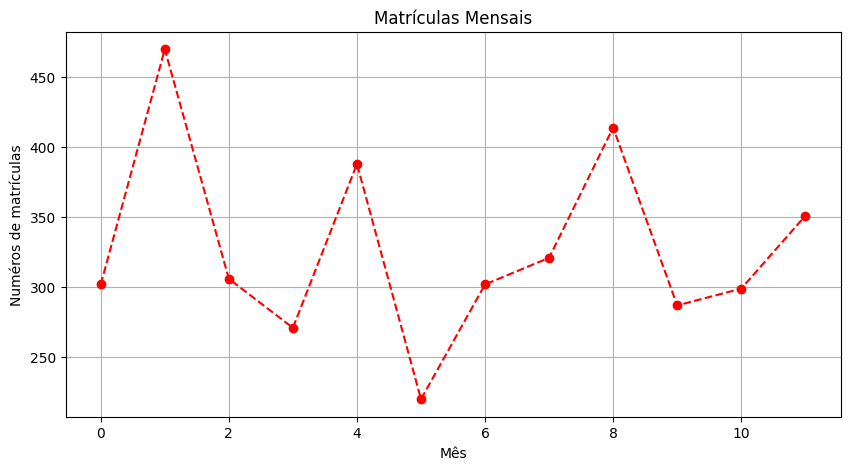

In [19]:
# grafico de matriculas mensais

# escolher gráfico
plt.figure(figsize=(10, 5))

# marker é o marcador que conecta as linhas
df['Matrículas'].plot(marker='o', linestyle='--', color='#ff0000', )
plt.title('Matrículas Mensais')
plt.xlabel('Mês')
plt.grid(True)
plt.ylabel('Numéros de matrículas')

# plt.show

In [20]:
# id mes com maior e menor num de matriculas
maior_matricula = df['Matrículas'].max()
index_maior_matricula = df['Matrículas'].idxmax()

print(maior_matricula, index_maior_matricula)

menor_matricula = df['Matrículas'].min()
index_menor_matricula = df['Matrículas'].idxmin()

print(menor_matricula, index_menor_matricula)

470 1
220 5


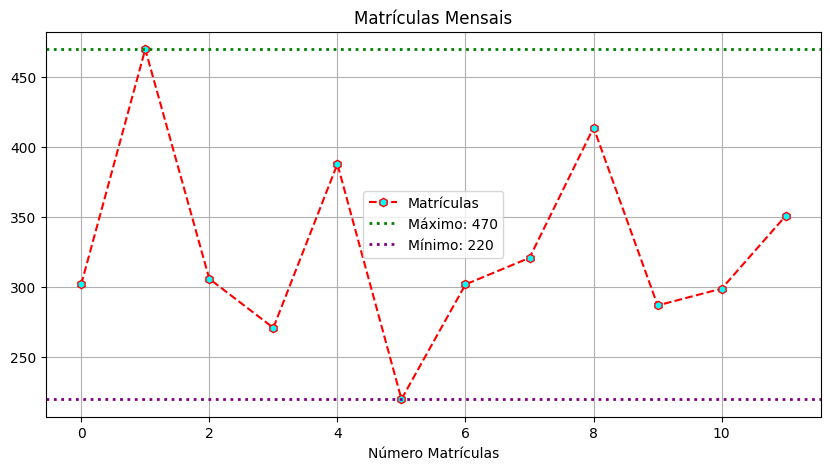

In [21]:
plt.figure(figsize=(10,5))

# mfc é a cor do marcador de 'ponta'
df['Matrículas'].plot(marker='h', linestyle='--', color='#ff0000', label='Matrículas', mfc='aqua')

# informações destacadas
# axhline marca onde está o maior e o menor
# depois da virgula da para PRESS ENTER to BREAK LINE
plt.axhline(y=maior_matricula,
             color='green', 
             linestyle=':', 
             linewidth=2, 
             label=f'Máximo: {maior_matricula}')

plt.axhline(y=menor_matricula,
             color='purple', 
             linestyle=':', 
             linewidth=2, 
             label=f'Mínimo: {menor_matricula}')

plt.title('Matrículas Mensais')
plt.xlabel('Mês')
plt.xlabel('Número Matrículas')
plt.grid()
plt.legend()

In [22]:
# Calculo de matriculas
media_matricula = df['Matrículas'].mean()
print(media_matricula)

327.5833333333333


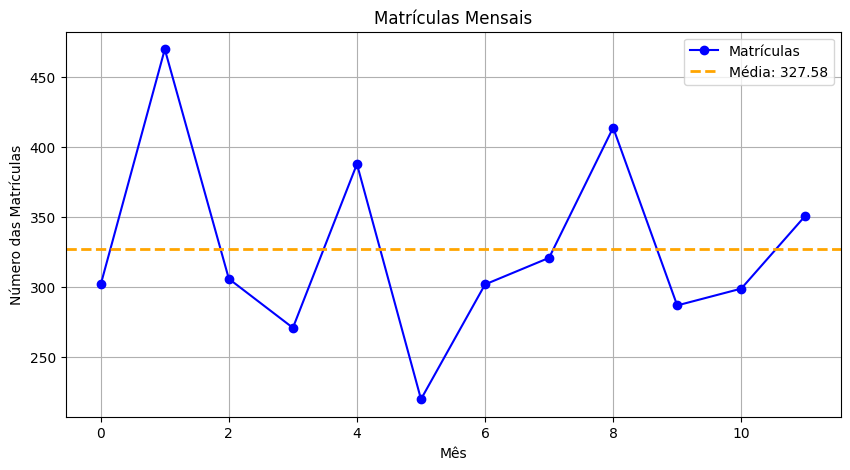

In [23]:
# plot grafico matriculas mensais e destacar media
plt.figure(figsize=(10,5))
df['Matrículas'].plot(marker='o', linestyle='-', color='blue', label='Matrículas')

# destaque VALOR = y
# destaque TEMPO = x
plt.axhline(y=media_matricula, color='orange', linestyle='--', linewidth=2, label=f'Média: {media_matricula:.2f}')
plt.title('Matrículas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número das Matrículas')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
# Tendências
# calc média das matrículas por TRIMESTRE

# 1. Converter coluna Datetime
    # se tinha 1 val em string, por precaução, converte td em padrão
df['Mês'] = pd.to_datetime(df['Mês'])

# 2. Definir col. datas como Index
    # inplace altera o DataFrame apenas visualmente, sem afetar o original
df.set_index(df['Mês'], inplace=True)

# 3. Calc média trimestral
    # QE / 4 = trimestre
    # QE / 2 = semestral
    # Q / Quadrimestre 
    # A / Anual
    # D / Diário
    # W / Semanal
    # H / Horário
media_trimestral = df['Matrículas'].resample('QE').mean()
print(media_trimestral)

Mês
2022-03-31    359.333333
2022-06-30    293.000000
2022-09-30    345.666667
2022-12-31    312.333333
Freq: QE-DEC, Name: Matrículas, dtype: float64


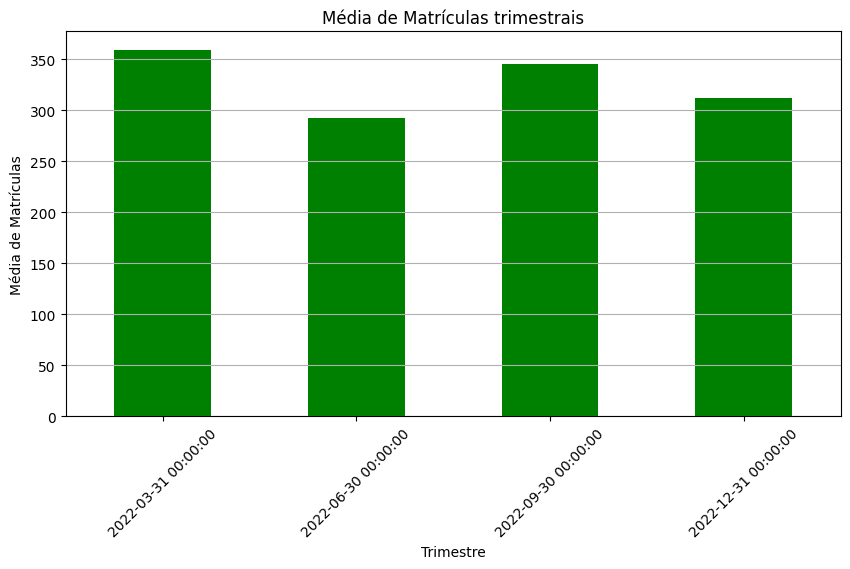

In [25]:
plt.figure(figsize=(10,5))
# kind, tipo de gráfico
media_trimestral.plot(kind='bar', color='green')
plt.title('Média de Matrículas trimestrais')
plt.xlabel('Trimestre')
plt.ylabel('Média de Matrículas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show() 

In [26]:
# Desvio Simples
# 1. Calc MÉDIA
# 2. Calc DESVIO (Mês) relação a MÉDIA

# Desvio padrão
df['Matrículas'].std()

# desvio simples
df['Matrículas'] - df['Matrículas'].mean()

Mês
2022-01-31    -25.583333
2022-02-28    142.416667
2022-03-31    -21.583333
2022-04-30    -56.583333
2022-05-31     60.416667
2022-06-30   -107.583333
2022-07-31    -25.583333
2022-08-31     -6.583333
2022-09-30     86.416667
2022-10-31    -40.583333
2022-11-30    -28.583333
2022-12-31     23.416667
Name: Matrículas, dtype: float64

In [27]:
# Variância é para detectar mudanças, quedas, etc
# pega MEDIA, pega DESVIO SIMPLES, calc VARIANCIA

# 1. Valor do desvio elevado a 2, a diferença da média **2
(df['Matrículas'] - df['Matrículas'].mean())**2


Mês
2022-01-31      654.506944
2022-02-28    20282.506944
2022-03-31      465.840278
2022-04-30     3201.673611
2022-05-31     3650.173611
2022-06-30    11574.173611
2022-07-31      654.506944
2022-08-31       43.340278
2022-09-30     7467.840278
2022-10-31     1647.006944
2022-11-30      817.006944
2022-12-31      548.340278
Name: Matrículas, dtype: float64

In [28]:
# Desvio padrao
    # media, desvio simples, variancia

In [29]:
# calc Variação Percentual
variacao = df['Matrículas'].pct_change()*100

In [32]:
import seaborn as sn

tab_variacao = pd.DataFrame({
    'Matrícula': df['Matrículas'],
    'Variação Percentual %': variacao
})

def colorir_variacao(valor):
    if valor > 0:
        color = 'green'
    elif valor < 0:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

tab_variacao.style.map(colorir_variacao, subset=['Variação Percentual %'])

,Matrícula,Variação Percentual %
Mês,,
2022-01-31 00:00:00,302,nan
2022-02-28 00:00:00,470,55.629139
2022-03-31 00:00:00,306,-34.893617
2022-04-30 00:00:00,271,-11.437908
2022-05-31 00:00:00,388,43.173432
2022-06-30 00:00:00,220,-43.298969
2022-07-31 00:00:00,302,37.272727
2022-08-31 00:00:00,321,6.291391
2022-09-30 00:00:00,414,28.971963
